In [2]:
from tweet_processor import TweetProcessor

dataset_file_path = 'datasets/hashtags-en-tweets.jsonl'

tweet_processor = TweetProcessor()

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
word_emb_tweets = tweet_processor.preprocess_tweets_for_word_embedding(dataset_file_path)

Removing stopwords and lemmatizing with spacy: [0 / 200526]
Removing stopwords and lemmatizing with spacy: [2000 / 200526]
Removing stopwords and lemmatizing with spacy: [4000 / 200526]
Removing stopwords and lemmatizing with spacy: [6000 / 200526]
Removing stopwords and lemmatizing with spacy: [8000 / 200526]
Removing stopwords and lemmatizing with spacy: [10000 / 200526]
Removing stopwords and lemmatizing with spacy: [12000 / 200526]
Removing stopwords and lemmatizing with spacy: [14000 / 200526]
Removing stopwords and lemmatizing with spacy: [16000 / 200526]
Removing stopwords and lemmatizing with spacy: [18000 / 200526]
Removing stopwords and lemmatizing with spacy: [20000 / 200526]
Removing stopwords and lemmatizing with spacy: [22000 / 200526]
Removing stopwords and lemmatizing with spacy: [24000 / 200526]
Removing stopwords and lemmatizing with spacy: [26000 / 200526]
Removing stopwords and lemmatizing with spacy: [28000 / 200526]
Removing stopwords and lemmatizing with spacy: [

In [5]:
for tweet in word_emb_tweets[-3:]:
    print(
        f'> HASHTAGS: {tweet.hashtags}\n'
        f'> ORIGINAL: {tweet.original_tweet["text"]}\n'
        f'> PROCESSED: {tweet.text}\n'
    )
    print('-' * 100)

> HASHTAGS: ['#EidalFitr', '#Eid', '#LetsDoLondon', '#EidMubarak', '#LondonEye']
> ORIGINAL: 🌙 @TheLondonEye was illuminated this evening with a special crescent moon light display to mark Eid al-Fitr.

#EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye https://t.co/ukRLvoHijE
> PROCESSED: illuminate this_evening special crescent moon light display mark eid_alfitr #EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#Eid', '#EidalFitr', '#Albania', '#EidMubarak', '#EidAroundTheWorld']
> ORIGINAL: Muslims in Albania participate in mass Eid prayer.

#Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld https://t.co/K5ha2z0O3i
> PROCESSED: muslim albania participate_in mass eid prayer #Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#FarageOnGBNews']

In [4]:
sent_emb_tweets = tweet_processor.preprocess_tweets_for_sentence_embedding(dataset_file_path)

In [7]:
for tweet in sent_emb_tweets[-3:]:
    print(
        f'> HASHTAGS: {tweet.hashtags}\n'
        f'> ORIGINAL: {tweet.original_tweet["text"]}\n'
        f'> PROCESSED: {tweet.text}\n'
    )
    print('-' * 100)

> HASHTAGS: ['#Eid', '#LetsDoLondon', '#EidMubarak']
> ORIGINAL: 🌙 @TheLondonEye was illuminated this evening with a special crescent moon light display to mark Eid al-Fitr.

#EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye https://t.co/ukRLvoHijE
> PROCESSED: 🌙 was illuminated this_evening with a special crescent moon light display to mark eid al-fitr.

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#Eid', '#Albania', '#EidMubarak']
> ORIGINAL: Muslims in Albania participate in mass Eid prayer.

#Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld https://t.co/K5ha2z0O3i
> PROCESSED: muslims in albania participate_in mass eid prayer.

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#FarageOnGBNews']
> ORIGINAL: 'Appalling, divisive, self-defeating. Shame on you the RAF for getting that so badly wrong’

@Nigel_Farage discuses the RAF asking for a

In [6]:
from collections import Counter

print(f'total number of tweets: {len(sent_emb_tweets)}')
unique_hashtags = set(hashtag for tweet in sent_emb_tweets for hashtag in tweet.hashtags)
print(f'number of unique hashtags: {len(unique_hashtags)}')
print('hashtag to count:')
hashtag_counter = Counter(hashtag for tweet in sent_emb_tweets for hashtag in tweet.hashtags)
print(hashtag_counter.most_common(30))

total number of tweets: 198954
number of unique hashtags: 3939
hashtag to count:
[('#Ukraine', 7123), ('#BREAKING', 7104), ('#UPDATE', 4947), ('#COVID19', 4362), ('#Russia', 3955), ('#affiliate', 3750), ('#TOLOnews', 3680), ('#Estonia', 3642), ('#Strictly', 3607), ('#AD', 3354), ('#COP26', 3254), ('#Russian', 3134), ('#ad', 2668), ('#KayBurley', 2052), ('#TomorrowsPapersToday', 2032), ('#Tunisia', 1976), ('#Ad', 1974), ('#SAFC', 1828), ('#AFPSports', 1568), ('#estonia', 1521), ('#StrictlyComeDancing', 1482), ('#Ukrainian', 1443), ('#Poland', 1284), ('#BBCBreakfast', 1124), ('#ImACeleb', 1106), ('#GMB', 1061), ('#TAP_En', 1041), ('#Northampton', 1026), ('#Emmerdale', 1010), ('#FORZAINTER', 1000)]


In [13]:
import json

with open('top_3000_hashtags.json', 'w') as file:
    top_3000_hashtags = [hashtag for hashtag, _ in hashtag_counter.most_common(3000)]
    json.dump(top_3000_hashtags, file)

    print(len(top_3000_hashtags))

3000


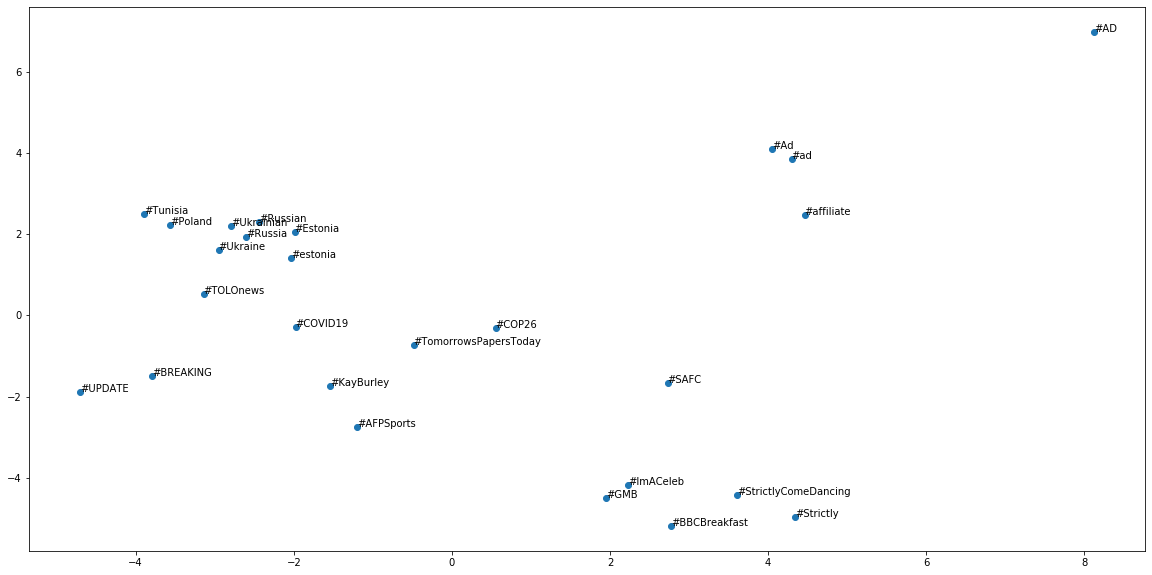

In [44]:
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

word_emb_model = pickle.load(open('save_files/word_emb_model.pkl', 'rb'))

top_hashtags = [hashtag for hashtag, _ in hashtag_counter.most_common(26)]

word_embs = [word_emb_model.get_embedding(hashtag) for hashtag in top_hashtags]

two_dim_word_embs = pca.fit_transform(word_embs)

x, y = two_dim_word_embs[:, 0], two_dim_word_embs[:, 1] 

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.scatter(x, y)

for i, hashtag in enumerate(top_hashtags):
    ax.annotate(hashtag, (x[i], y[i]))
